# Fetch the data

Get necessary files

In [2]:
import glob

In [3]:
# Get only the files from the data dir
file_paths = glob.glob("./data/*.pack.table")

In [4]:
import os

def extract_filename(fp):
    """
    Takes a filepath and gives you only the filename without the extension
    """
    base=os.path.basename(fp)
    return base.split(".")[0]

In [5]:
file_stubs = [extract_filename(name) for name in file_paths]

Read it into a pandas dataframe

In [6]:
import pandas as pd

In [7]:
def read_coverage_table(fp):
    """
    Call pandas.read_csv on a file
    """
    return pd.read_csv(fp,  sep='\t', lineterminator='\n')

In [23]:
cov_tables = [read_coverage_table(f) for f in file_paths]
cov_tables

[        seq.pos  node.id  node.offset  coverage
 0             0        1            0        15
 1             1        1            1        15
 2             2        1            2        15
 3             3        1            3        14
 4             4        1            4        15
 ...         ...      ...          ...       ...
 196484   196484      748           67         0
 196485   196485      748           68         0
 196486   196486      748           69         0
 196487   196487      748           70         0
 196488   196488      748           71         0
 
 [196489 rows x 4 columns],
         seq.pos  node.id  node.offset  coverage
 0             0        1            0        20
 1             1        1            1        20
 2             2        1            2        21
 3             3        1            3        21
 4             4        1            4        21
 ...         ...      ...          ...       ...
 196484   196484      748           67 

# Use a binary matrix

In [9]:
def binarize(x):
    if x == 0:
        return 0;
    else:
        return 1

Visualize the data frame

In [10]:
coverage_vectors = pd.DataFrame([cov_tables[i]["coverage"].map(binarize) for i in range(len(file_paths))], 
                                index=file_stubs)
coverage_vectors

,0,1,2,3,4,5,6,7,8,9,...,196479,196480,196481,196482,196483,196484,196485,196486,196487,196488
H_504_02_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_504_26_03,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
H_506_23_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_506_09_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_518_19_03,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_525_02_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_506_30_04,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
H_535_05_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_513_13_04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
H_513_30_03,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
coverage_vectors.shape[1]

196489

In [59]:
coverage_vectors.iloc[0]

0         1
1         1
2         1
3         1
4         1
         ..
196484    0
196485    0
196486    0
196487    0
196488    0
Name: H_504_02_04, Length: 196489, dtype: int64

# Visualize the coverages

In [15]:
import matplotlib.pyplot as plt

## Scatter plot

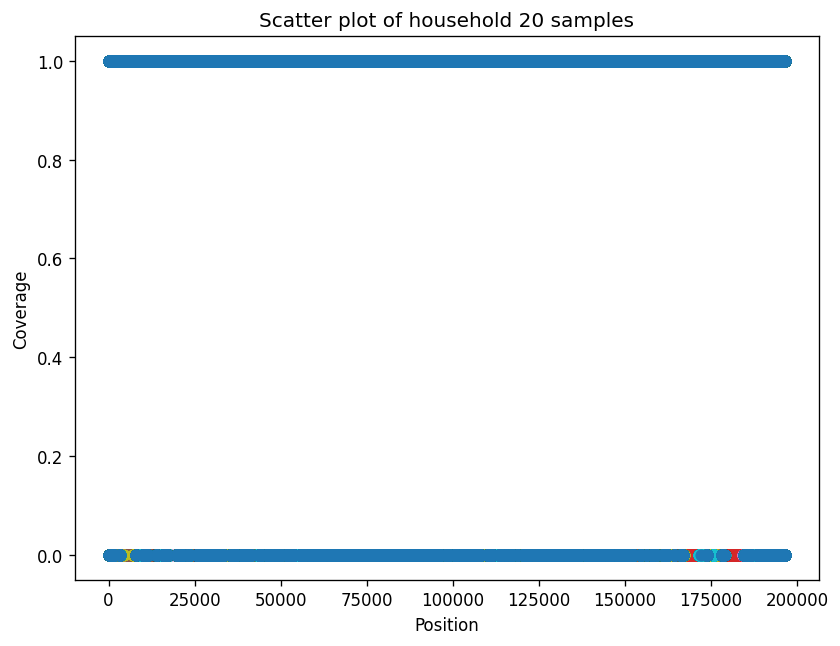

In [63]:
from math import log
plt.figure(num=None, figsize=(8, 6), dpi=120)

"""
For each sample
for i in range(len(file_paths)):
    sample = cov_tables[i]
    plt.scatter(sample['node.id'], sample['coverage'])
    
    stub = file_stubs[i]
    plt.title('{} vs Coverage'.format(stub))
    plt.xlabel('{}'.format(stub))
    plt.ylabel('coverage')
    plt.show()
"""

num_rows = coverage_vectors.shape[0]
num_cols = coverage_vectors.shape[1]

# For each row in the coverage vectors dataframe
for i in range(num_rows):
    plt.scatter(cov_tables[i]['seq.pos'], coverage_vectors.iloc[i])
    
    stub = file_stubs[i]
    plt.title('Scatter plot of household 20 samples')
    plt.xlabel("Position")
    plt.ylabel('Coverage')

## Rainbow plot

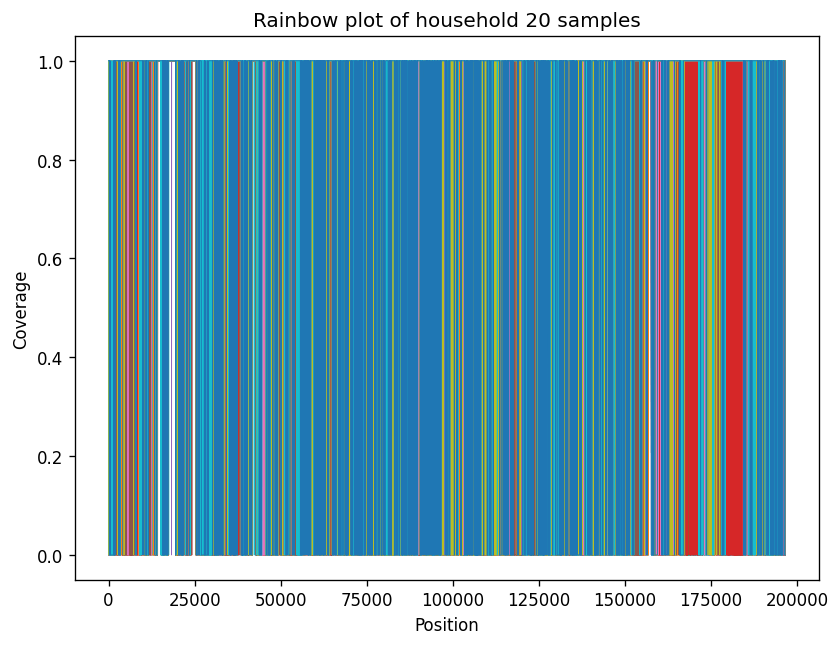

In [66]:
plt.figure(num=None, figsize=(8, 6), dpi=120)

num_rows = coverage_vectors.shape[0]
num_cols = coverage_vectors.shape[1]

for i in range(num_rows):
    sample = cov_tables[i]
    plt.plot(cov_tables[i]['seq.pos'], coverage_vectors.iloc[i], linewidth=0.5)
    plt.title('Rainbow plot of household 20 samples')
    plt.xlabel("Position")
    plt.ylabel('Coverage')